# Credit Card Fraud Detection using Gaussian Mixture Model

##Part 1: Data Exploration
We are going to work with a credit card fraud dataset. This dataset contains 28 principal component features meaningful information about the dataset.

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=24e94b3b6dc0a002d5c4348fb5a911fb7210b8aef9dec9d7f6d4da37edf0b5f0
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

df = pd.read_csv('creditcard.csv')

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Data Information:

- Only 0.17% of observsations (492 rows) are fraudulent, and 99.83% are non-fraudulent transactions.
- Class imbalance issue is important because it will lead to low predictive accuracy of classification algorithms. The algorithm would almost always favor the class with higher occurrence.



Percentage of fradulent transactions in dataset =  0.1727485630620034 %
Percentage of non-fradulent transactions in dataset =  99.82725143693798 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fraud Percentage Plot (Not fraud = 0, Fraud = 1)')

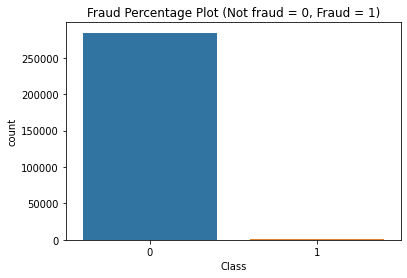

In [ ]:
import seaborn as sns

## Since in Class 0 is non-fraud and 1 is fraud
fraud_ratio = df.Class.mean()
nonfraud_ratio = 1 - fraud_ratio
print('Percentage of fradulent transactions in dataset = ', fraud_ratio * 100, "%")
print('Percentage of non-fradulent transactions in dataset = ', nonfraud_ratio * 100, "%")

## Percentage plot
sns.countplot(df.Class).set_title('Fraud Percentage Plot (Not fraud = 0, Fraud = 1)')

In [ ]:
pd.value_counts(df['Class'], sort=True)

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
### Split the data  ###
import copy

df_copy = df.copy(deep=True)
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


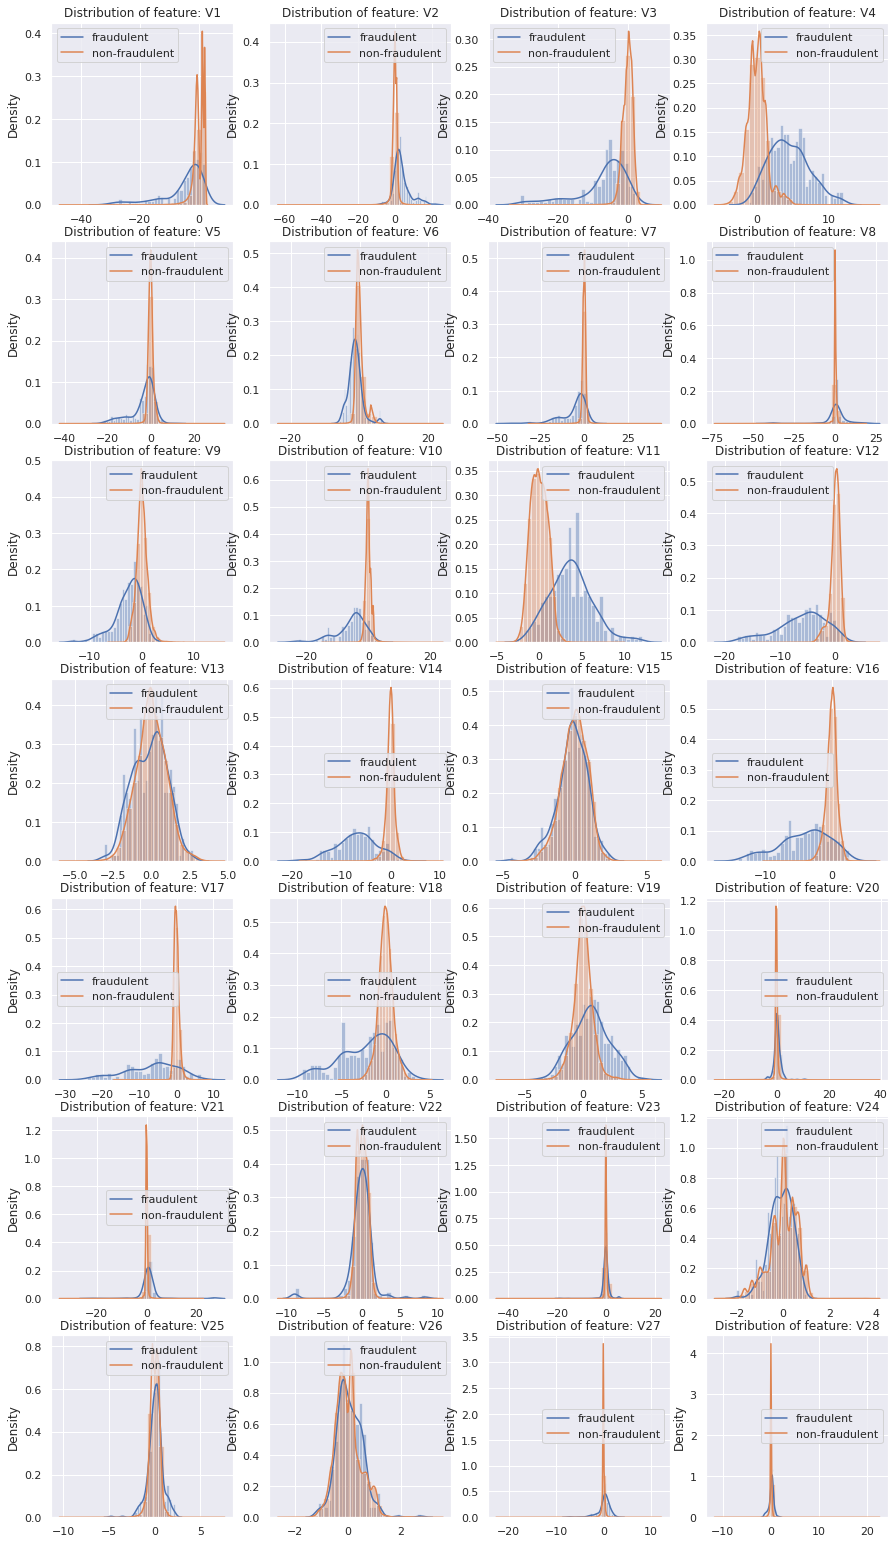

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
import warnings

features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots, 4)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)
    warnings.filterwarnings("ignore")


Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

From the above plots, we can see that the features have different levels of sensitivity/selectivity regarding the Class label (fraud vs. non-fraud). We can roughly separate the features into three categories via observation:
- Best separation between two Classes: V3, V4, V11, V12, V14, V16, V17;
- Partial separation between Classes: V1, V2, V5-10, V18, V19, V27, V28;
- Similar distribution for both Classes: the rest of the features.

We can also observe that the feature distributions for non-fraud transactions all center around 0 and follow normal distribution shape. However, the fraud ("1" Class) distributions can have different skewnesses and means. 

## Part 2: *Unsupervised,* One Gaussian -- Single feature model with one Gaussian distribution

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.mixture import GaussianMixture
from prettytable import PrettyTable

## Set up table for features and AUC
x = PrettyTable()
x.field_names = ["Feature Name", "AUC"]

gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
feature_auc = {}

for col in X_train:
  gm.fit(X_train[[col]])
  c = gm.score_samples(X_train[[col]])
  fpr, tpr, _ = roc_curve(y_train, 1-c)
  auc_ = auc(fpr,tpr)
  feature_auc[col] = auc_
  x.add_row([col, auc_])

print(x)


+--------------+--------------------+
| Feature Name |        AUC         |
+--------------+--------------------+
|     Time     | 0.5107263009117694 |
|      V1      | 0.7051015812269326 |
|      V2      | 0.8374993400600963 |
|      V3      | 0.8765373286404597 |
|      V4      | 0.8921026912367481 |
|      V5      | 0.7718253540864317 |
|      V6      | 0.7343799160971521 |
|      V7      | 0.8629666193840206 |
|      V8      | 0.773238328202733  |
|      V9      | 0.802874345039229  |
|     V10      | 0.9135997429711575 |
|     V11      | 0.8971751804921982 |
|     V12      | 0.9201801648680984 |
|     V13      | 0.5721515919643825 |
|     V14      | 0.9524586211308497 |
|     V15      | 0.5147644850163967 |
|     V16      | 0.9021367779975271 |
|     V17      | 0.9348519852193852 |
|     V18      | 0.8080298501832649 |
|     V19      | 0.7418740662077927 |
|     V20      | 0.7346917354260328 |
|     V21      | 0.8335210293445873 |
|     V22      | 0.5612872589326006 |
|     V23   

In [ ]:
## Find best feature based on AUC
print("Feature with best AUC:", max(feature_auc, key=feature_auc.get), ", with AUC =", max(feature_auc.values()))

Feature with best AUC: V14 , with AUC = 0.9524586211308497


In [ ]:
## Find an optimal threshold that maximizes the F1 Score in the training 
## feature with best AUC (which is V14 from above)
from sklearn.metrics import f1_score

gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train[[max(feature_auc, key=feature_auc.get)]])
p_gm = gm.score_samples(X_train[[max(feature_auc, key=feature_auc.get)]])
epsilon = min(p_gm)
best_f1 = 0

for i in range(1, len(p_gm), 100):
    mn_gm = sorted(p_gm)[i]
    f1_ = f1_score(y_train, p_gm < mn_gm)
    if f1_ > best_f1:
      best_f1 = f1_
      epsilon = mn_gm

print("Best F1 score within feature with best AUC =", best_f1, ", threshold =", epsilon)

Best F1 score within feature with best AUC = 0.609907120743034 , threshold = -21.09553853544224


## Part 3: *Supervised,* One Gaussian -- Single feature model with one Gaussian distribution

In [ ]:
## Merge X_train and y_train then filter out fraud data
new_train = pd.merge(X_train, y_train, left_index=True, right_index=True)
nonfraud_train = new_train[new_train["Class"] == 0]
X_train_nonfraud = nonfraud_train.iloc[:,:-1]
y_train_nonfraud = nonfraud_train.iloc[:,-1]

## Set up table for features and AUC
x2 = PrettyTable()
x2.field_names = ["Feature Name", "AUC"]

gm2 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
feature_auc2 = {}

## Fit non-fraud and compute AUC based on full training data
for col in X_train_nonfraud:
  gm2.fit(X_train_nonfraud[[col]])
  c = gm2.score_samples(X_train[[col]])
  fpr, tpr, _ = roc_curve(y_train, 1-c)
  auc_2 = auc(fpr,tpr)
  feature_auc2[col] = auc_2
  x2.add_row([col, auc_2])

print(x2)

+--------------+--------------------+
| Feature Name |        AUC         |
+--------------+--------------------+
|     Time     | 0.5108048892862972 |
|      V1      | 0.7053496385277029 |
|      V2      | 0.8380149124207863 |
|      V3      | 0.8773922612151736 |
|      V4      | 0.8926122340223726 |
|      V5      | 0.7718805960628186 |
|      V6      | 0.7345142998873242 |
|      V7      | 0.8631674450134431 |
|      V8      | 0.7733526279735436 |
|      V9      | 0.8032625681139904 |
|     V10      | 0.9135581476417189 |
|     V11      | 0.8976122518635063 |
|     V12      | 0.9207877974799726 |
|     V13      | 0.5721416300577521 |
|     V14      | 0.9525990781886603 |
|     V15      | 0.5147805784474295 |
|     V16      | 0.9020690690736615 |
|     V17      | 0.9344398914356076 |
|     V18      | 0.8079802299845962 |
|     V19      | 0.7419888174685237 |
|     V20      | 0.7348354548626229 |
|     V21      | 0.8338777063816862 |
|     V22      | 0.5612889046861813 |
|     V23   

In [ ]:
## Find best feature based on AUC
print("Feature with best AUC:", max(feature_auc2, key=feature_auc2.get), ", with AUC =", max(feature_auc2.values()))

Feature with best AUC: V14 , with AUC = 0.9525990781886603


In [ ]:
## Find an optimal threshold that maximizes the F1 Score in the training 
## feature with best AUC (which is still V14)
gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm3.fit(X_train_nonfraud[[max(feature_auc2, key=feature_auc2.get)]])
p_gm2 = gm3.score_samples(X_train[[max(feature_auc2, key=feature_auc2.get)]])
epsilon2 = min(p_gm2)
best_f1_2 = 0

for i in range(1, len(p_gm2), 100):
    mn_gm2 = sorted(p_gm2)[i]
    f1_2 = f1_score(y_train, p_gm2 < mn_gm2)
    if f1_2 > best_f1_2:
      best_f1_2 = f1_2
      epsilon2 = mn_gm2

print("Best F1 score within feature with best AUC =", best_f1_2, ", threshold =", epsilon2)

Best F1 score within feature with best AUC = 0.609907120743034 , threshold = -23.825596410400813


The results of Part 3 seem to be very similar to those in Part 2, with the same F1 score and just a slight difference in the threshold. Using a model based on the full dataset versus a model based only on non-fraudulent data does not seem to make a big difference on performance. This might be due to the class imbalance issue where the fraudulent observations only make up to a tiny fraction of the dataset, while most of the data is non-fraudulent. Therefore if the model is trained on only the non-fraudulent data points, the performance can be very similar to the case when the model is trained on full data.

## Part 4: *Supervised,* Two Gaussians -- Single feature model with two Gaussian distributions

- Use two separate distributions for fraudulent and non-fraudulent transactions;
- Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1`` with the feature that leads to the best AUC in Part 3;
- Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``;
- Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively;
- Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions);
- Repeat the steps above for at least two other features.

In [ ]:
## Develop a helper function to streamline the steps
def two_gaussians(n:int, feature: list):

    ## Fit G1 on non-fraud X_train
    G1 = GaussianMixture(n_components = n,
                        covariance_type = 'full', random_state=0, )
    G1.fit(X_train_nonfraud[feature])

    ## Filter for only fraud training data
    fraud_train = new_train[new_train["Class"] == 1]
    X_train_fraud = fraud_train.iloc[:,:-1]
    y_train_fraud = fraud_train.iloc[:,-1]

    ## Fit G2 on same feature but on fraud X_train
    G2 = GaussianMixture(n_components = n,
                        covariance_type = 'full', random_state=0, )
    G2.fit(X_train_fraud[feature])

    ## Compute score samples for both on whole training set
    S1 = G1.score_samples(X_train[feature])
    S2 = G2.score_samples(X_train[feature])

    ## Find optimal c * S2 (threshold) that maximizes F1 score
    best_f1_4 = 0

    for c in np.arange(1, 10, 0.1):    
        f1_4 = f1_score(y_train, S1 < (c * S2))
        if f1_4 > best_f1_4:
          best_f1_4 = f1_4
          threshold = c

    print("Best F1 score =", best_f1_4, ", S2 multiplier =", threshold)

    return best_f1_4, threshold

In [ ]:
## Find optimal c * S2 (threshold) that maximizes F1 score with best feature from Part 3
two_gaussians(1, [max(feature_auc2, key=feature_auc2.get)])

Best F1 score = 0.6353677621283255 , S2 multiplier = 9.700000000000008


(0.6353677621283255, 9.700000000000008)

In [ ]:
## Find optimal c * S2 (threshold) that maximizes F1 score with a different feature
two_gaussians(1, ["V11"])

Best F1 score = 0.603588907014682 , S2 multiplier = 3.8000000000000025


(0.603588907014682, 3.8000000000000025)

In [ ]:
## Find optimal c * S2 (threshold) that maximizes F1 score with a different feature
two_gaussians(1, ["V12"])

Best F1 score = 0.6866666666666666 , S2 multiplier = 5.0000000000000036


(0.6866666666666666, 5.0000000000000036)

In [ ]:
## Find optimal c * S2 (threshold) that maximizes F1 score with a different feature
two_gaussians(1, ["V17"])

Best F1 score = 0.6476761619190405 , S2 multiplier = 6.100000000000005


(0.6476761619190405, 6.100000000000005)

Here we can see that after comparing the performance of this supervised model fitted on a few different single features, the one fitted with feature "V12" or "V17" actually has a slightly higher F1 score ("V12" F1 = 0.687, "V17" F1 = 0.648) than that of "V14" (0.635). This is interesting and we can now try a few models to see how a combination of these features will perform in Part 5.

## Part 5: Multivariate and Mixture of Gaussians Distribution

In [ ]:
gm_check = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
feature_auc = {}
  
## Fit and compute AUC based on full training data
for col in X_train:
  gm_check.fit(X_train[[col]])
  c = gm_check.score_samples(X_train[[col]])
  fpr, tpr, _ = roc_curve(y_train, 1-c)
  auc_ = auc(fpr,tpr)
  feature_auc[col] = auc_

{'Amount': 0.6274017752729311,
 'Time': 0.5107263009117694,
 'V1': 0.7051015812269326,
 'V10': 0.9135997429711575,
 'V11': 0.8971751804921982,
 'V12': 0.9201801648680984,
 'V13': 0.5721515919643825,
 'V14': 0.9524586211308497,
 'V15': 0.5147644850163967,
 'V16': 0.9021367779975271,
 'V17': 0.9348519852193852,
 'V18': 0.8080298501832649,
 'V19': 0.7418740662077927,
 'V2': 0.8374993400600963,
 'V20': 0.7346917354260328,
 'V21': 0.8335210293445873,
 'V22': 0.5612872589326006,
 'V23': 0.6963263648776961,
 'V24': 0.4692288428364315,
 'V25': 0.574918030912641,
 'V26': 0.5032716780154484,
 'V27': 0.8354788061528755,
 'V28': 0.8142006105163218,
 'V3': 0.8765373286404597,
 'V4': 0.8921026912367481,
 'V5': 0.7718253540864317,
 'V6': 0.7343799160971521,
 'V7': 0.8629666193840206,
 'V8': 0.773238328202733,
 'V9': 0.802874345039229}

In [ ]:
## Get top 5 features with highest AUC
top_auc_features = dict(sorted(feature_auc.items(), key=lambda x: x[1], reverse=True)[:5])
top_auc_features = list(top_auc_features.keys())
top_auc_features

['V14', 'V17', 'V12', 'V10', 'V16']

Here is the list of features with top 5 AUC scores. This is the result of sorting the features based on their AUC and taking the top five. This list will be useful in the models below as we explore Multivariate Gaussian models, since we'll be using the relatively more important features to fit the models.

In [ ]:
## Supervised Models with non-fraudulent transactions (like part 3)
def non_fraud_single_feature(n: int):
  gm = GaussianMixture(n_components = n,
                    covariance_type = 'full', random_state=0, )
  feature_auc = {}
  
  ## Fit non-fraud and compute AUC based on full training data
  for col in X_train_nonfraud:
    gm.fit(X_train_nonfraud[[col]])
    c = gm.score_samples(X_train[[col]])
    fpr, tpr, _ = roc_curve(y_train, 1-c)
    auc_ = auc(fpr,tpr)
    feature_auc[col] = auc_

  ## Find best feature based on AUC
  print("Feature with best AUC:", max(feature_auc, key=feature_auc.get), ", with AUC =", max(feature_auc.values()))

  gm.fit(X_train_nonfraud[[max(feature_auc, key=feature_auc.get)]])
  p_gm = gm.score_samples(X_train[[max(feature_auc, key=feature_auc.get)]])
  epsilon = min(p_gm)
  best_f1 = 0

  for i in range(1, len(p_gm), 100):
      mn_gm = sorted(p_gm)[i]
      f1_ = f1_score(y_train, p_gm < mn_gm)
      if f1_ > best_f1:
        best_f1 = f1_
        epsilon = mn_gm

  print("Best F1 score within feature with best AUC =", best_f1, ", threshold =", epsilon)

  return feature_auc, best_f1


## Non-fraud only, single feature, various Gaussian models
auc_list = []
f1_list = []

for i in range(1, 4):
  feature_auc, best_f1 = non_fraud_single_feature(i)
  auc_list.append(max(feature_auc.values()))
  f1_list.append(best_f1)


Feature with best AUC: V14 , with AUC = 0.9525990781886603
Best F1 score within feature with best AUC = 0.609907120743034 , threshold = -23.825596410400813
Feature with best AUC: V14 , with AUC = 0.9529164027817314
Best F1 score within feature with best AUC = 0.6068111455108359 , threshold = -12.29599337289722
Feature with best AUC: V14 , with AUC = 0.9529593962735041
Best F1 score within feature with best AUC = 0.5603715170278639 , threshold = -11.131892703264725


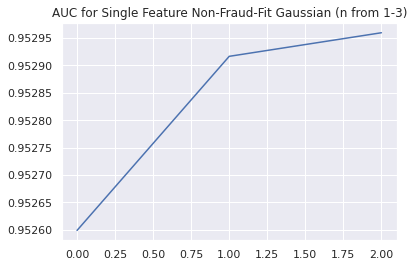

<Figure size 1440x720 with 0 Axes>

In [ ]:
## AUC plot for above results
plt.plot(auc_list)
plt.title('AUC for Single Feature Non-Fraud-Fit Gaussian (n from 1-3)')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
## Results using part 3 approach (Non-fraud only, single feature, various Gaussian models)
set1 = PrettyTable()
set1.field_names = ["n component", "AUC", "F1 score"]

for i in range(1, 4):
  set1.add_row([i, auc_list[i-1], f1_list[i-1]])

print(set1)

+-------------+--------------------+--------------------+
| n component |        AUC         |      F1 score      |
+-------------+--------------------+--------------------+
|      1      | 0.9525990781886603 | 0.609907120743034  |
|      2      | 0.9529164027817314 | 0.6068111455108359 |
|      3      | 0.9529593962735041 | 0.5603715170278639 |
+-------------+--------------------+--------------------+


Using the Part 3 single feature approach (which is to fit Gaussian model with only non-fraudulent training data then compute AUC and F1 using the full training data), we can see that although the AUC scores increase as n component increases, the F1 scores of the model actually decrease. The 1-cluster Gaussian has the higher F1 in this case, which is 0.6099.

In [ ]:
## Supervised Models with non-fraudulent transactions (like part 3 but fit all features)
def non_fraud_multivariate(n: int, features: list):
  gm = GaussianMixture(n_components = n,
                    covariance_type = 'full', random_state=0, )
  
  ## Fit non-fraud and compute AUC based on full training data
  gm.fit(X_train_nonfraud[features])
  c = gm.score_samples(X_train[features])
  fpr, tpr, _ = roc_curve(y_train, 1-c)
  auc_ = auc(fpr,tpr)

  ## Find best feature based on AUC
  print("Feature list:", features, ", AUC =", auc_)

  gm.fit(X_train_nonfraud[features])
  p_gm = gm.score_samples(X_train[features])
  epsilon = min(p_gm)
  best_f1 = 0

  for i in range(1, len(p_gm), 100):
      mn_gm = sorted(p_gm)[i]
      f1_ = f1_score(y_train, p_gm < mn_gm)
      if f1_ > best_f1:
        best_f1 = f1_
        epsilon = mn_gm

  print("Best F1 score =", best_f1, ", threshold =", epsilon)

  return auc_, best_f1

## Non-fraud only, multivariate (5 features with top AUC), various Gaussian models
auc_list = []
f1_list = []

for i in range(1, 4):
  auc_, best_f1 = non_fraud_multivariate(i, top_auc_features)
  auc_list.append(auc_)
  f1_list.append(best_f1)


Feature list: ['V14', 'V17', 'V12', 'V10', 'V16'] , AUC = 0.9602647362122807
Best F1 score = 0.7430340557275542 , threshold = -102.07325993036653
Feature list: ['V14', 'V17', 'V12', 'V10', 'V16'] , AUC = 0.9634943309978925
Best F1 score = 0.7461300309597524 , threshold = -38.40718488793933
Feature list: ['V14', 'V17', 'V12', 'V10', 'V16'] , AUC = 0.9638941034761009
Best F1 score = 0.7492260061919505 , threshold = -38.15536854904511


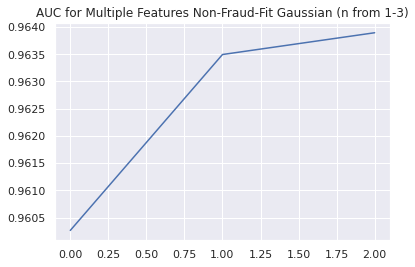

<Figure size 1440x720 with 0 Axes>

In [ ]:
## AUC plot for above results
plt.plot(auc_list)
plt.title('AUC for Multiple Features Non-Fraud-Fit Gaussian (n from 1-3)')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
## Results using part 3 approach (Non-fraud only, multivariate, various Gaussian models)
set2 = PrettyTable()
set2.field_names = ["n component", "AUC", "F1 score"]

for i in range(1, 4):
  set2.add_row([i, auc_list[i-1], f1_list[i-1]])

print(set2)

+-------------+--------------------+--------------------+
| n component |        AUC         |      F1 score      |
+-------------+--------------------+--------------------+
|      1      | 0.9602647362122807 | 0.7430340557275542 |
|      2      | 0.9634943309978925 | 0.7461300309597524 |
|      3      | 0.9638941034761009 | 0.7492260061919505 |
+-------------+--------------------+--------------------+


Similar to the first set of models, these 5 models also use the part 3 approach, with the only difference in feature set. Instead of using only one feature at a time, these models fit the five features (non_fraud only) with the best AUC scores before calculating F1 scores. This time we can see a significant improvement of F1 scores. The model with the highest F1 score, 0.7492, is a 3-cluster Gaussian fitting on 5 features.

In addition to the several single-feature models already explored in Part 4, here we try using the same approach but with the five features with high AUC scores instead.

**NOTE**: In Parts 2&3, we ROC curve and AUC values to help find the **threshold** that maximizes F1 score of the model. However, Part 4 uses a different approach. In Part 4 we have two distributions, one representing fraud likelihood while the other represents non-fraudulent likelihood. By **comparing** these two distributions by multiplying S2 by "c", we find the **multiplier that maximizes the resulting F1 score** of the model. Since in part 4 we don't have a threshold on values and we compare the probabilities of S1 and c*S2 to make a prediction, we do not have AUC scores for the models using the Part 4 approach.



In [ ]:
## Supervised Models with both classes like part 4 (Comparison between G1 and G2, no AUC)
f1_list = []
s2_multiplier_list = []

## 10 multivariate models with features V11, V12, V14, V17 and different n_components
for i in range(1, 4):
  best_f1, c_ = two_gaussians(i, top_auc_features)
  f1_list.append(best_f1)
  s2_multiplier_list.append(c_)


Best F1 score = 0.7993874425727411 , S2 multiplier = 7.800000000000006
Best F1 score = 0.8185907046476761 , S2 multiplier = 2.9000000000000017
Best F1 score = 0.8206686930091185 , S2 multiplier = 2.8000000000000016


In [ ]:
## Results using part 4 approach
## (Comparison between G1 and G2, multivariate, various Gaussian models)
set3 = PrettyTable()
set3.field_names = ["n component", "F1 score", "S2 Multiplier"]

for i in range(1, 4):
  set3.add_row([i, f1_list[i-1], s2_multiplier_list[i-1]])

print(set3)

+-------------+--------------------+--------------------+
| n component |      F1 score      |   S2 Multiplier    |
+-------------+--------------------+--------------------+
|      1      | 0.7993874425727411 | 7.800000000000006  |
|      2      | 0.8185907046476761 | 2.9000000000000017 |
|      3      | 0.8206686930091185 | 2.8000000000000016 |
+-------------+--------------------+--------------------+


Using the Part 4 approach by comparing G1 (non_fraud) and G2 (fraud), the above models also implement various n components of Gaussian clusters, while using only the five features with best AUC. The results indicate that this time the 3-cluster Gaussian model performs the best, with an F1 score of 0.8207.

In [ ]:
## Supervised Models with both classes like part 4 (Comparison between G1 and G2, no AUC)
f1_list = []
s2_multiplier_list = []

## 15 multivariate models with all features and different n_components
for i in range(1, 4):
  best_f1, c_ = two_gaussians(i, list(X_train.columns))
  f1_list.append(best_f1)
  s2_multiplier_list.append(c_)


Best F1 score = 0.7231638418079096 , S2 multiplier = 5.400000000000004
Best F1 score = 0.817109144542773 , S2 multiplier = 7.000000000000005
Best F1 score = 0.7848484848484848 , S2 multiplier = 2.000000000000001


In [ ]:
## Results using part 4 approach
## (Comparison between G1 and G2, all features, various Gaussian models)
set4 = PrettyTable()
set4.field_names = ["n component", "F1 score", "S2 Multiplier"]

for i in range(1, 4):
  set4.add_row([i, f1_list[i-1], s2_multiplier_list[i-1]])

print(set4)

+-------------+--------------------+-------------------+
| n component |      F1 score      |   S2 Multiplier   |
+-------------+--------------------+-------------------+
|      1      | 0.7231638418079096 | 5.400000000000004 |
|      2      | 0.817109144542773  | 7.000000000000005 |
|      3      | 0.7848484848484848 | 2.000000000000001 |
+-------------+--------------------+-------------------+


Compared to the third set of models above (using same approach but with only the top five features), we can see that this fourth set of models actually perform similarly (with all features). Considering the fact that this approach utilizes all features and results in similar F1 scores with a lower n_component (2), we should try the 2-cluster model above for testing.

In [ ]:
## Unsupervised Single-Feature Models (like part 2)
def unsup_single_feature(n: int):
  gm = GaussianMixture(n_components = n,
                    covariance_type = 'full', random_state=0, )
  feature_auc = {}
  
  ## Fit and compute AUC based on full training data
  for col in X_train:
    gm.fit(X_train[[col]])
    c = gm.score_samples(X_train[[col]])
    fpr, tpr, _ = roc_curve(y_train, 1-c)
    auc_ = auc(fpr,tpr)
    feature_auc[col] = auc_

  ## Find best feature based on AUC
  print("Feature with best AUC:", max(feature_auc, key=feature_auc.get), ", with AUC =", max(feature_auc.values()))

  gm.fit(X_train[[max(feature_auc, key=feature_auc.get)]])
  p_gm = gm.score_samples(X_train[[max(feature_auc, key=feature_auc.get)]])
  epsilon = min(p_gm)
  best_f1 = 0

  for i in range(1, len(p_gm), 100):
      mn_gm = sorted(p_gm)[i]
      f1_ = f1_score(y_train, p_gm < mn_gm)
      if f1_ > best_f1:
        best_f1 = f1_
        epsilon = mn_gm

  print("Best F1 score within feature with best AUC =", best_f1, ", threshold =", epsilon)

  return feature_auc, best_f1

## Both classes, single feature, various Gaussian models
auc_list = []
f1_list = []

for i in range(1, 4):
  feature_auc, best_f1 = unsup_single_feature(i)
  auc_list.append(max(feature_auc.values()))
  f1_list.append(best_f1)

Feature with best AUC: V14 , with AUC = 0.9524586211308497
Best F1 score within feature with best AUC = 0.609907120743034 , threshold = -21.09553853544224
Feature with best AUC: V14 , with AUC = 0.9527965540541572
Best F1 score within feature with best AUC = 0.6006191950464397 , threshold = -9.734460046147738
Feature with best AUC: V14 , with AUC = 0.9529286512663455
Best F1 score within feature with best AUC = 0.5603715170278639 , threshold = -8.508069128080212


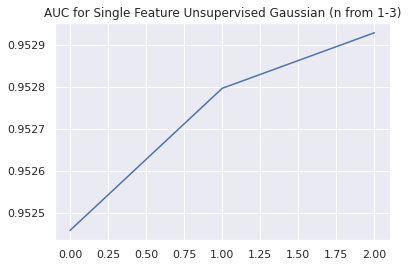

<Figure size 1440x720 with 0 Axes>

In [ ]:
## AUC plot for above results
plt.plot(auc_list)
plt.title('AUC for Single Feature Unsupervised Gaussian (n from 1-3)')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
## Results using part 2 approach (Unsupervised, single feature, various Gaussian models)
set5 = PrettyTable()
set5.field_names = ["n component", "AUC", "F1 score"]

for i in range(1, 4):
  set5.add_row([i, auc_list[i-1], f1_list[i-1]])

print(set5)

+-------------+--------------------+--------------------+
| n component |        AUC         |      F1 score      |
+-------------+--------------------+--------------------+
|      1      | 0.9524586211308497 | 0.609907120743034  |
|      2      | 0.9527965540541572 | 0.6006191950464397 |
|      3      | 0.9529286512663455 | 0.5603715170278639 |
+-------------+--------------------+--------------------+


From the fifth set of single-feature models using the Part 2 Unsupervised approach, we can see that the F1 scores are much lower than those of other models. The multivariate unsupervised approach will be explored below.

In [ ]:
## Unsupervised Multivariate Models (similar to part 2)
def unsup_multivariate(n: int, features: list):
  gm = GaussianMixture(n_components = n,
                    covariance_type = 'full', random_state=0, )
  
  ## Fit and compute AUC based on full training data
  gm.fit(X_train[features])
  c = gm.score_samples(X_train[features])
  fpr, tpr, _ = roc_curve(y_train, 1-c)
  auc_ = auc(fpr,tpr)

  ## Find best feature based on AUC
  print("Feature list:", features, ", AUC =", auc_)

  gm.fit(X_train[features])
  p_gm = gm.score_samples(X_train[features])
  epsilon = min(p_gm)
  best_f1 = 0

  for i in range(1, len(p_gm), 100):
      mn_gm = sorted(p_gm)[i]
      f1_ = f1_score(y_train, p_gm < mn_gm)
      if f1_ > best_f1:
        best_f1 = f1_
        epsilon = mn_gm

  print("Best F1 score =", best_f1, ", threshold =", epsilon)

  return auc_, best_f1

## Non-fraud only, multivariate (5 features with top AUC), various Gaussian models
auc_list = []
f1_list = []

for i in range(1, 4):
  auc_, best_f1 = unsup_multivariate(i, top_auc_features)
  auc_list.append(auc_)
  f1_list.append(best_f1)

Feature list: ['V14', 'V17', 'V12', 'V10', 'V16'] , AUC = 0.960098238380998
Best F1 score = 0.6263565891472869 , threshold = -71.06473235919294
Feature list: ['V14', 'V17', 'V12', 'V10', 'V16'] , AUC = 0.9600068917751717
Best F1 score = 0.5046439628482972 , threshold = -20.568505570570558
Feature list: ['V14', 'V17', 'V12', 'V10', 'V16'] , AUC = 0.9615798972219607
Best F1 score = 0.4984520123839009 , threshold = -20.161111317269324


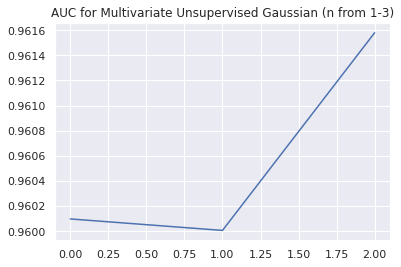

<Figure size 1440x720 with 0 Axes>

In [ ]:
## AUC plot for above results
plt.plot(auc_list)
plt.title('AUC for Multivariate Unsupervised Gaussian (n from 1-3)')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
## Results using part 2 approach (Unsupervised, multivariate, various Gaussian models)
set6 = PrettyTable()
set6.field_names = ["n component", "AUC", "F1 score"]

for i in range(1, 4):
  set6.add_row([i, auc_list[i-1], f1_list[i-1]])

print(set6)

+-------------+--------------------+--------------------+
| n component |        AUC         |      F1 score      |
+-------------+--------------------+--------------------+
|      1      | 0.960098238380998  | 0.6263565891472869 |
|      2      | 0.9600068917751717 | 0.5046439628482972 |
|      3      | 0.9615798972219607 | 0.4984520123839009 |
+-------------+--------------------+--------------------+


These set of multivariate unsupervised models have even lower F1 scores, so we will not consider using these for testing.

## Part 6: Evaluating performance on test set

For testing, the results from Part 5 indicates that we either use the 3-component 2-Gaussian comparison model fitted on top five features only, or the 2-component 2-Gaussian comparison model fitted on all features (both using Part 4 approach).

Upon further testing, we can see that the second model seems to have slightly better performance. Therefore, we will proceed to use the Supervised 2-cluster model with similar approach as Part 4 (G1 G2 comparison) fitting on all features for testing below.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

## For this model, we use Supervised Part 4 approach
## n_component = 2
## S2 multiplier = 7

## Fit G1 on non-fraud X_train
G1 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train_nonfraud)

## Filter for only fraud training data
fraud_train = new_train[new_train["Class"] == 1]
X_train_fraud = fraud_train.iloc[:,:-1]
y_train_fraud = fraud_train.iloc[:,-1]

## Fit G2 on fraud X_train
G2 = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
G2.fit(X_train_fraud)

## Compute score samples for both on test set
S1 = G1.score_samples(X_test)
S2 = G2.score_samples(X_test)

## Check performance
precision_ = precision_score(y_test, S1 < (7 * S2))
recall_ = recall_score(y_test, S1 < (7 * S2))
f1_ = f1_score(y_test, S1 < (7 * S2))

print(classification_report(S1 < (7 * S2), y_test))
print("The testing precision score is ", precision_, ", recall is ", recall_, 
      ", and F1 score is ", f1_)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     85304
        True       0.80      0.84      0.82       139

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

The testing precision score is  0.841726618705036 , recall is  0.7959183673469388 , and F1 score is  0.8181818181818182
